In [1]:
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir('../funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4'))

['a.txt', 'a.txt.feature.npy', 'b.txt', 'b.txt.feature.npy', 'c.txt', 'c.txt.feature.npy', 'HW4-2020SpringV3-SVM.pdf']


In [3]:
df1 = pd.read_fwf('../funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/a.txt', header = None)

In [4]:
df1.shape

(2096, 1)

In [5]:
df1.columns=['password']

In [147]:
df2 = pd.read_fwf('../funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/b.txt',header = None)

In [148]:
df2.shape

(2108, 1)

In [149]:
df2.columns=['password']

In [10]:
df3 = pd.read_fwf('../funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/c.txt',header = None)

In [11]:
df3.shape

(2276, 1)

In [12]:
df3.columns=['password']

In [13]:
df1.head()

,password
0,!2QqWwee
1,!Hihellohi!
2,!devilyloco19
3,!p1f&9stephanus{/
4,#7X8NY&w*B


In [150]:
df2.head()

,password
0,11111111
1,12345678
2,123456aa
3,1234abcd
4,1715


In [15]:
df3.head()

,password
0,!!sweetness!!
1,!1assword
2,!@#$1234qwer
3,!@#Qweasd
4,!@#jkl@me


In [16]:
df1['char_count'] = df1['password'].str.len() #1.글자수
df1['upper'] = df1['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isupper()])) #2.대문자수
df1['numerics'] = df1['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isdigit()])) #3.숫자수
# specialSymbol = ['!', '@', '#', '$', '%','^','&','*,'(',')']
# df1['specialSymbol'] = df1['password'].apply(lambda x: len([x for x in list(x) if x in specialSymbol]))
# df1['specialChar'] = df1['password'].apply(lambda x: 
#                                            len([x for x in list(x)
#                                                           if x in ['!','@','%','*','(',')','^','&','$','#','-','_','~','/','?','`','{','}','+',' ']))#4.특수기호 
import re
specialSymbol = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》{\}\[\]\.\'''\']'
# df1['specialChar'] = df1['password'].apply(lambda x: len([x for x in list(x) if not in x.isdigit() and x.isalpha()]))
df1['specialSymbol'] = df1['password'].apply(lambda x: len([x for x in list(x) if x in specialSymbol]))

df1.head()

,password,char_count,upper,numerics,specialSymbol
0,!2QqWwee,8,2,1,1
1,!Hihellohi!,11,1,0,2
2,!devilyloco19,13,0,2,1
3,!p1f&9stephanus{/,17,0,2,4
4,#7X8NY&w*B,10,4,2,3


In [17]:
df3.loc[(df3['char_count']<8), '3class8'] = 0
df3.loc[(df3['char_count']>=8) & (df3['upper']!=0) & (df3['numerics']!=0) | (df3['specialSymbol']!=0), '3class8'] = 1
df3.loc[(df3['char_count']>=8) & (df3['upper']!=0) | (df3['numerics']!=0) & (df3['specialSymbol']!=0), '3class8'] = 1
df3.loc[(df3['char_count']>=8) & (df3['upper']!=0) & (df3['numerics']!=0) & (df3['specialSymbol']!=0), '3class8'] = 1
df3.loc[(df3['char_count']>=8) & (df3['upper']==0) & (df3['numerics']==0) | (df3['specialSymbol']==0), '3class8'] = 0

In [18]:
df1

,password,char_count,upper,numerics,specialSymbol,3class8
0,!2QqWwee,8,2,1,1,1.0
1,!Hihellohi!,11,1,0,2,1.0
2,!devilyloco19,13,0,2,1,1.0
3,!p1f&9stephanus{/,17,0,2,4,1.0
4,#7X8NY&w*B,10,4,2,3,1.0
5,#devilyloco03,13,0,2,1,1.0
6,$$MO3yss,8,2,1,2,1.0
7,$coat5stain,11,0,1,1,1.0
8,$imonwootest123,15,0,3,1,1.0
9,$seapahjjfjs987z,16,0,3,1,1.0


In [19]:
df1['3class8'] = df1['3class8'].values.astype('Int64')

In [20]:
df1

,password,char_count,upper,numerics,specialSymbol,3class8
0,!2QqWwee,8,2,1,1,1
1,!Hihellohi!,11,1,0,2,1
2,!devilyloco19,13,0,2,1,1
3,!p1f&9stephanus{/,17,0,2,4,1
4,#7X8NY&w*B,10,4,2,3,1
5,#devilyloco03,13,0,2,1,1
6,$$MO3yss,8,2,1,2,1
7,$coat5stain,11,0,1,1,1
8,$imonwootest123,15,0,3,1,1
9,$seapahjjfjs987z,16,0,3,1,1


In [52]:
aSet = df1.iloc[:,1:7]

In [53]:
aSet.to_csv('a.txt.feature')

In [54]:
aSet_load =  pd.read_csv("a.txt.feature", index_col = 0)

In [55]:
aSet_load

,char_count,upper,numerics,specialSymbol,3class8
0,8,2,1,1,1
1,11,1,0,2,1
2,13,0,2,1,1
3,17,0,2,4,1
4,10,4,2,3,1
5,13,0,2,1,1
6,8,2,1,2,1
7,11,0,1,1,1
8,15,0,3,1,1
9,16,0,3,1,1


In [56]:
df1.sum()
#2. how many password  are 3class 8 in each file (df1 a.k.a a.txt in this cases) 
# Answer: 2096 

password         !2QqWwee!Hihellohi!!devilyloco19!p1f&9stephanu...
char_count                                                   27841
upper                                                         3263
numerics                                                      9765
specialSymbol                                                 2364
3class8                                                       1320
dtype: object

In [57]:
df1.std() #standard deviation for each feature

char_count       3.703654
upper            2.670196
numerics         3.711242
specialSymbol    1.499042
3class8          0.482981
dtype: float64

In [58]:
df1.mean() #mean for each feature

char_count       13.282920
upper             1.556775
numerics          4.658874
specialSymbol     1.127863
3class8           0.629771
dtype: float64

In [59]:
df1.median() #median for each feature

char_count       13.0
upper             1.0
numerics          3.0
specialSymbol     1.0
3class8           1.0
dtype: float64

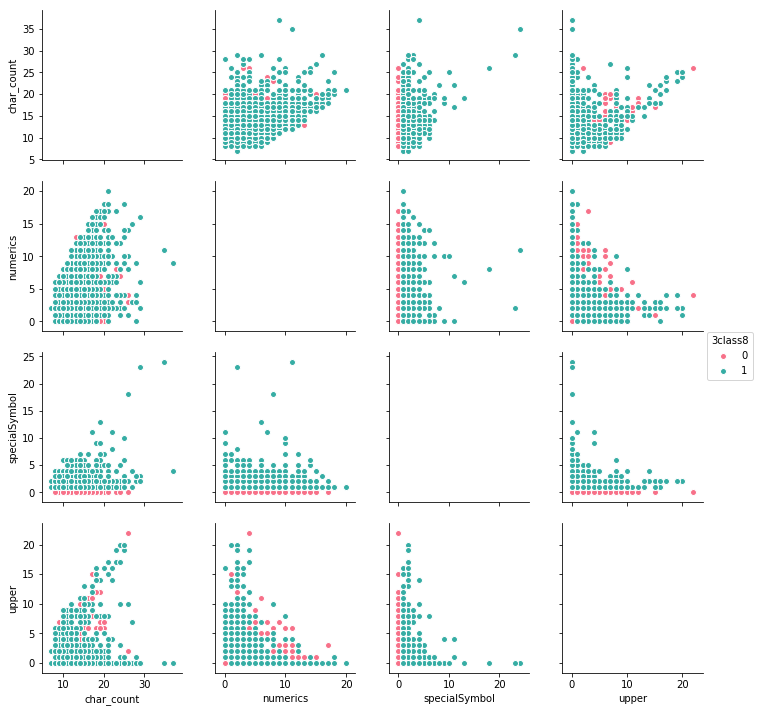

In [60]:
import seaborn as sns
sns.pairplot(data = df1, hue = '3class8', vars = df1.columns.difference(['password','3class8']), diag_kind = {'kde'}, palette = 'husl')
#plot the password length histogram for each file 

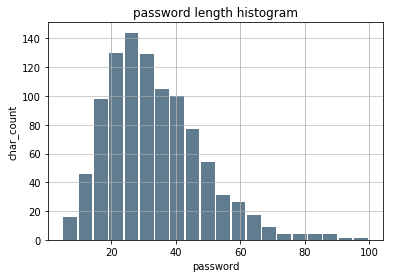

In [61]:
import pandas as pd

#4. (analysis)plot the password length histogram for each file. 
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('password length histogram')
plt.xlabel('password')
plt.ylabel('char_count')
plt.grid(axis='y', alpha=0.75)

In [155]:
df2

,password,char_count
0,11111111,8
1,12345678,8
2,123456aa,8
3,1234abcd,8
4,1715,4
5,22222222,8
6,33333333,8
7,P@ssword,8
8,P@ssword123,11
9,a1b2c3d4e5,10


In [154]:
df2['char_count'] = df2['password'].str.len() #1.글자수

In [161]:
# df2.drop('upper',axis = 1)

In [151]:
#결측치탐색
df2.isnull().sum()

password    1
dtype: int64

In [152]:
#NaN값 제거(from password)
df2 = df2.dropna()

In [153]:
#제거값 확인 (summarion is 0)
df2.isnull().sum()

password    0
dtype: int64

In [158]:
df2['upper'] = df2['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isupper()])) #2.대문자수

In [160]:
# df2.drop(columns = ['upper'])

In [162]:
df2['numerics'] = df2['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isdigit()])) #3.숫자수

In [163]:
df2['specialSymbol'] = df2['password'].apply(lambda x: len([x for x in list(x) if x in specialSymbol])) 
#특수기호

In [166]:
df2.loc[(df2['char_count']<8), '3class8'] = 0
df2.loc[(df2['char_count']>=8) & (df2['upper']!=0) & (df2['numerics']!=0) | (df2['specialSymbol']!=0), '3class8'] = 1
df2.loc[(df2['char_count']>=8) & (df2['upper']!=0) | (df2['numerics']!=0) & (df2['specialSymbol']!=0), '3class8'] = 1
df2.loc[(df2['char_count']>=8) & (df2['upper']!=0) & (df2['numerics']!=0) & (df2['specialSymbol']!=0), '3class8'] = 1
df2.loc[(df2['char_count']>=8) & (df2['upper']==0) & (df2['numerics']==0) | (df2['specialSymbol']==0), '3class8'] = 0

In [168]:
df2['3class8'] = df2['3class8'].values.astype('Int64')

In [169]:
df2

,password,char_count,upper,numerics,specialSymbol,3class8
0,11111111,8,0,8,0,0
1,12345678,8,0,8,0,0
2,123456aa,8,0,6,0,0
3,1234abcd,8,0,4,0,0
4,1715,4,0,4,0,0
5,22222222,8,0,8,0,0
6,33333333,8,0,8,0,0
7,P@ssword,8,1,0,1,1
8,P@ssword123,11,1,3,1,1
9,a1b2c3d4e5,10,0,5,0,0


In [170]:
bSet = df2.iloc[:,1:7]

In [171]:
bSet.to_csv('b.txt.feature')

In [172]:
bSet_load =  pd.read_csv("b.txt.feature", index_col = 0)

In [173]:
bSet_load

,char_count,upper,numerics,specialSymbol,3class8
0,8,0,8,0,0
1,8,0,8,0,0
2,8,0,6,0,0
3,8,0,4,0,0
4,4,0,4,0,0
5,8,0,8,0,0
6,8,0,8,0,0
7,8,1,0,1,1
8,11,1,3,1,1
9,10,0,5,0,0


In [175]:
df2.sum()

password         1111111112345678123456aa1234abcd17152222222233...
char_count                                                   19321
upper                                                         1966
numerics                                                      5667
specialSymbol                                                  412
3class8                                                        252
dtype: object

In [176]:
df2.std()

char_count       1.385924
upper            0.529995
numerics         1.698695
specialSymbol    0.827885
3class8          0.324572
dtype: float64

In [177]:
df2.mean()

char_count       9.169910
upper            0.933080
numerics         2.689606
specialSymbol    0.195539
3class8          0.119601
dtype: float64

In [178]:
df2.median()

char_count       9.0
upper            1.0
numerics         2.0
specialSymbol    0.0
3class8          0.0
dtype: float64

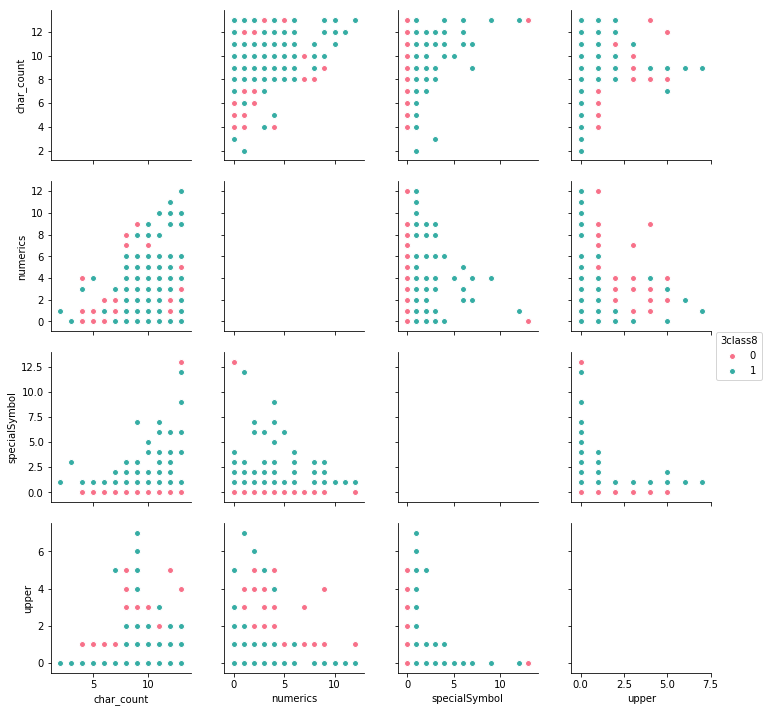

In [179]:
import seaborn as sns
sns.pairplot(data = df2, hue = '3class8', vars = df2.columns.difference(['password','3class8']), diag_kind = {'kde'}, palette = 'husl')
#plot the password length histogram for each file 

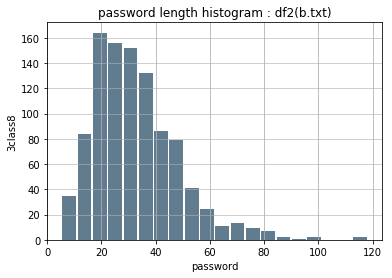

In [180]:
#4. (analysis)plot the password length histogram for each file. 
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('password length histogram : df2(b.txt)')
plt.xlabel('password')
plt.ylabel('3class8')
plt.grid(axis='y', alpha=0.75)

In [181]:
df3['char_count'] = df3['password'].str.len() #1.글자수

In [182]:
df3['upper'] = df3['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isupper()])) #2.대문자수

In [183]:
df3['numerics'] = df3['password'].apply(lambda x: len([str(x) for x in list(x) if str(x).isdigit()])) #3.숫자수

In [184]:
#specialSymbol = '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》{\}\[\]\.\'''\']'
df3['specialSymbol'] = df3['password'].apply(lambda x: len([x for x in list(x) if x in specialSymbol]))

In [185]:
df3.loc[(df3['char_count']<8), '3class8'] = 0
df3.loc[(df3['char_count']>=8) & (df3['upper']!=0) & (df3['numerics']!=0) | (df3['specialSymbol']!=0), '3class8'] = 1
df3.loc[(df3['char_count']>=8) & (df3['upper']!=0) | (df3['numerics']!=0) & (df3['specialSymbol']!=0), '3class8'] = 1
df3.loc[(df3['char_count']>=8) & (df3['upper']!=0) & (df3['numerics']!=0) & (df3['specialSymbol']!=0), '3class8'] = 1
df3.loc[(df3['char_count']>=8) & (df3['upper']==0) & (df3['numerics']==0) | (df3['specialSymbol']==0), '3class8'] = 0

In [187]:
df3['3class8'] = df3['3class8'].values.astype('Int64')

In [188]:
df3

,password,char_count,upper,numerics,specialSymbol,3class8
0,!!sweetness!!,13,0,0,4,0
1,!1assword,9,0,1,1,1
2,!@#$1234qwer,12,0,4,4,1
3,!@#Qweasd,9,1,0,3,1
4,!@#jkl@me,9,0,0,4,0
5,!Lxw2468,8,1,4,1,1
6,!bath939,8,0,3,1,1
7,!chinchilla1,12,0,1,1,1
8,!dizzy3!,8,0,1,2,1
9,!jenny728,9,0,3,1,1


In [190]:
cSet = df1.iloc[:,1:7]

In [191]:
cSet.to_csv('c.txt.feature')

In [192]:
cSet_load =  pd.read_csv("c.txt.feature", index_col = 0)

In [193]:
cSet_load

,char_count,upper,numerics,specialSymbol,3class8
0,8,2,1,1,1
1,11,1,0,2,1
2,13,0,2,1,1
3,17,0,2,4,1
4,10,4,2,3,1
5,13,0,2,1,1
6,8,2,1,2,1
7,11,0,1,1,1
8,15,0,3,1,1
9,16,0,3,1,1


In [194]:
df3.sum()

password         !!sweetness!!!1assword!@#$1234qwer!@#Qweasd!@#...
char_count                                                   22482
upper                                                          461
numerics                                                      6001
specialSymbol                                                 1608
3class8                                                       1316
dtype: object

In [195]:
df3.mean()

char_count       9.877856
upper            0.202548
numerics         2.636643
specialSymbol    0.706503
3class8          0.578207
dtype: float64

In [196]:
df3.median()

char_count       9.0
upper            0.0
numerics         2.0
specialSymbol    1.0
3class8          1.0
dtype: float64

In [197]:
df3.std()

char_count       1.971672
upper            0.524405
numerics         1.577661
specialSymbol    0.671539
3class8          0.493954
dtype: float64

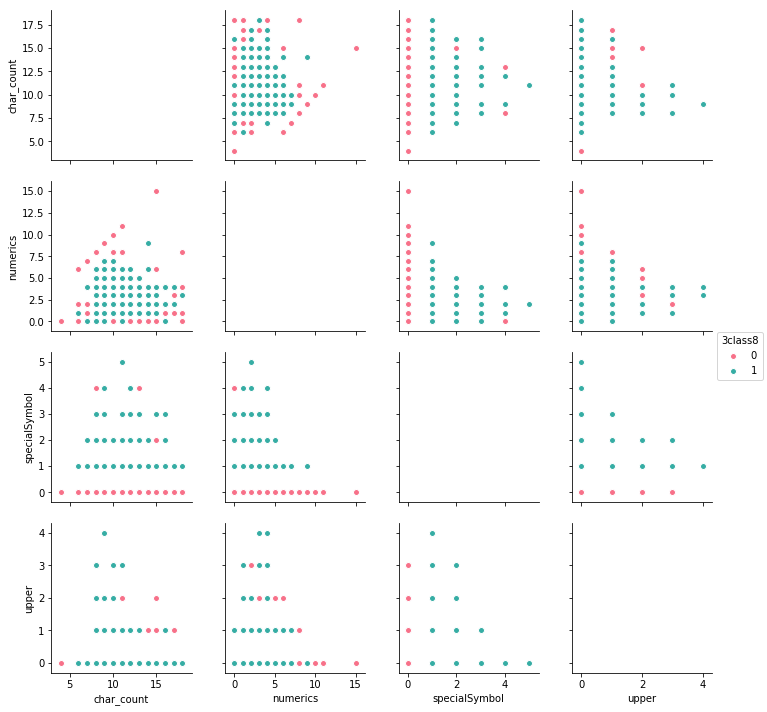

In [198]:
sns.pairplot(data = df3, hue = '3class8', vars = df3.columns.difference(['password','3class8']), diag_kind = {'kde'}, palette = 'husl')
#plot the password length histogram for each file 

(array([  1.,   0.,  11.,  15., 690., 457., 371., 289., 195., 126.,  60.,
         30.,  25.]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 13 Patch objects>)

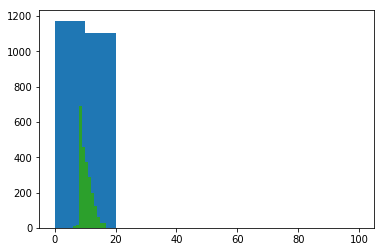

In [199]:
plt.hist(df3['char_count'], bins=[0, 10, 20, 30, 40, 50, 100])
plt.hist(df3['char_count'], bins=range(min(df3['char_count']), max(df3['char_count'])))
plt.hist(df3['char_count'], bins=np.arange(min(df3['char_count']), max(df3['char_count'])))

In [202]:
a = aSet_load
b = bSet_load

In [ ]:
# from sklearn.model_selection import train_test_split
# a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.2)

In [ ]:
# import sklearn.metrics as metrics

# aSet = np.array([1,0,1,0,1,1,0]) #0은 a셋 1은 b셋 
# bSet = np.array([0,1,1,0,1,0,1,0])#나의예측
# # sklearn 을 이용하면 전부 계산해준다.

# print('accuracy', metrics.accuracy_score(y,p) )

# print('precision', metrics.precision_score(y,p) )

# print('recall', metrics.recall_score(y,p) )

# print('f1', metrics.f1_score(y,p) )



# print(metrics.classification_report(y,p))

# print(metrics.confusion_matrix(y,p))

In [216]:
np.save('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/a.txt.feature', aSet) 
np.save('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/b.txt.feature', bSet) 
np.save('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/c.txt.feature', cSet) 

In [218]:
#배열저장 및 배열불러오기
aSet_load = np.load('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/a.txt.feature.npy')
bSet_load = np.load('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/b.txt.feature.npy')
cSet_load = np.load('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/c.txt.feature.npy')

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [249]:
print(os.listdir('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/'))

['.ipynb_checkpoints', 'a.txt', 'a.txt.feature.npy', 'b.txt', 'b.txt.feature.npy', 'c.txt', 'c.txt.feature.npy', 'HW4-2020SpringV3-SVM.pdf', 'HW4_final.ipynb']


In [264]:
print(train.isnull().values.any())
print(test.isnull().values.any(),'\n')

False
False 



In [287]:
df1['label'] = 0
df1

,password,char_count,upper,numerics,specialSymbol,3class8,label
0,!2QqWwee,8,2,1,1,1,0
1,!Hihellohi!,11,1,0,2,1,0
2,!devilyloco19,13,0,2,1,1,0
3,!p1f&9stephanus{/,17,0,2,4,1,0
4,#7X8NY&w*B,10,4,2,3,1,0
5,#devilyloco03,13,0,2,1,1,0
6,$$MO3yss,8,2,1,2,1,0
7,$coat5stain,11,0,1,1,1,0
8,$imonwootest123,15,0,3,1,1,0
9,$seapahjjfjs987z,16,0,3,1,1,0


In [288]:
df2['label'] = 1
df2

,password,char_count,upper,numerics,specialSymbol,3class8,label
0,11111111,8,0,8,0,0,1
1,12345678,8,0,8,0,0,1
2,123456aa,8,0,6,0,0,1
3,1234abcd,8,0,4,0,0,1
4,1715,4,0,4,0,0,1
5,22222222,8,0,8,0,0,1
6,33333333,8,0,8,0,0,1
7,P@ssword,8,1,0,1,1,1
8,P@ssword123,11,1,3,1,1,1
9,a1b2c3d4e5,10,0,5,0,0,1


In [291]:
df3['label'] = 2
df3

,password,char_count,upper,numerics,specialSymbol,3class8,label
0,!!sweetness!!,13,0,0,4,0,2
1,!1assword,9,0,1,1,1,2
2,!@#$1234qwer,12,0,4,4,1,2
3,!@#Qweasd,9,1,0,3,1,2
4,!@#jkl@me,9,0,0,4,0,2
5,!Lxw2468,8,1,4,1,1,2
6,!bath939,8,0,3,1,1,2
7,!chinchilla1,12,0,1,1,1,2
8,!dizzy3!,8,0,1,2,1,2
9,!jenny728,9,0,3,1,1,2


In [330]:
label_a = df1.iloc[:,1:8]
label_a.to_csv('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/aSet_load.csv', sep = ',', index = False)
label_b = df2.iloc[:,1:8]
label_b.to_csv('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/bSet_load.csv', sep = ',',index = False)
label_c = df3.iloc[:,1:8]
label_c.to_csv('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/cSet_load.csv', sep = ',', index = False)

In [331]:
pd.read_csv('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/aSet_load.csv', engine ='python')

,char_count,upper,numerics,specialSymbol,3class8,label
0,8,2,1,1,1,0
1,11,1,0,2,1,0
2,13,0,2,1,1,0
3,17,0,2,4,1,0
4,10,4,2,3,1,0
5,13,0,2,1,1,0
6,8,2,1,2,1,0
7,11,0,1,1,1,0
8,15,0,3,1,1,0
9,16,0,3,1,1,0


In [338]:
sh_a = shuffle(pd.read_csv('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/aSet_load.csv', engine = 'python'))
sh_b = shuffle(pd.read_csv('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/bSet_load.csv', engine = 'python'))

In [340]:
whole_set = pd.concat([sh_a,sh_b])

In [344]:
train = whole_set.drop('label', axis = 1)
test =  whole_set['label']

In [345]:
x_train,x_test,y_train,y_test = train_test_split(train, test, test_size = 0.2, stratify=test)

In [346]:
scaler = StandardScaler()

In [350]:
x_train_scaled = scaler.fit_transform(x_train)

In [351]:
x_test_scaled = scaler.transform(x_test)

In [352]:
num_cols = x_train._get_numeric_data().columns

In [353]:
print("Number of numeric feature:", num_cols.size)

Number of numeric feature: 5


In [363]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [365]:
encoder.fit(y_train.astype(object))

LabelEncoder()

In [366]:
y_train = encoder.transform(y_train)

In [367]:
encoder.fit(y_train)

LabelEncoder()

In [368]:
y_test = encoder.transform(y_test)

In [369]:
names_of_predictors = list(x_train.columns.values)

In [370]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [371]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)

In [372]:
svm_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [374]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(x_test_scaled)
y_pred_label = list(encoder.inverse_transform(y_pred))

Best score for training data: 0.8679357525282569 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [376]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,y_pred_label))
print("\n")
print(classification_report(y_test,y_pred_label))

print("Training set score for SVM: %f" % final_model.score(x_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(x_test_scaled  , y_test ))

svm_model.score

[[345  74]
 [ 55 367]]


             precision    recall  f1-score   support

          0       0.86      0.82      0.84       419
          1       0.83      0.87      0.85       422

avg / total       0.85      0.85      0.85       841

Training set score for SVM: 0.867936
Testing  set score for SVM: 0.846611


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [379]:
from sklearn.ensemble import ExtraTreesClassifier
feature_extract_1 = ExtraTreesClassifier(n_estimators = 5)
feature_extract_1.fit(x_train, y_train)
print(feature_extract_1.feature_importances_)

[0.35216847 0.13514563 0.16404674 0.04922124 0.29941793]


In [ ]:
# 1순위: char_count
# 2순위: 3class8
# 3순위: numerics
#as follow the above feature importances calculation. 

In [382]:
three_keywords = whole_set.loc[:,['char_count','3class8','numerics','label']]

In [384]:
three_keywords.head(10)

,char_count,3class8,numerics,label
1386,15,1,4,0
214,19,1,6,0
1249,11,1,8,0
524,13,1,8,0
1421,10,1,6,0
628,19,1,4,0
435,10,0,2,0
1506,12,0,6,0
717,8,1,5,0
129,9,1,4,0


In [385]:
train = three_keywords.drop('label', axis = 1)
test =  three_keywords['label']

In [386]:
x_train,x_test,y_train,y_test = train_test_split(train, test, test_size = 0.2, stratify=test)

In [387]:
scaler = StandardScaler()

In [388]:
x_train_scaled = scaler.fit_transform(x_train)

In [389]:
x_test_scaled = scaler.transform(x_test)

In [390]:
num_cols = x_train._get_numeric_data().columns

In [391]:
print("Number of numeric feature:", num_cols.size)

Number of numeric feature: 3


In [392]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [393]:
encoder.fit(y_train.astype(object))

LabelEncoder()

In [394]:
y_test = encoder.transform(y_test)

In [395]:
names_of_predictors = list(x_train.columns.values)

In [396]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [397]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)

In [398]:
svm_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [399]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(x_test_scaled)
y_pred_label = list(encoder.inverse_transform(y_pred))

Best score for training data: 0.8408685306365259 

Best C: 1000 

Best Kernel: linear 

Best Gamma: auto 



In [400]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,y_pred_label))
print("\n")
print(classification_report(y_test,y_pred_label))

print("Training set score for SVM: %f" % final_model.score(x_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(x_test_scaled  , y_test ))

svm_model.score

[[349  70]
 [ 70 352]]


             precision    recall  f1-score   support

          0       0.83      0.83      0.83       419
          1       0.83      0.83      0.83       422

avg / total       0.83      0.83      0.83       841

Training set score for SVM: 0.839679
Testing  set score for SVM: 0.833532


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [401]:
sh_c = shuffle(pd.read_csv('C:/Users/funny/Desktop/성균관대3학기_과제/data analysis application/homeworks/HW4/HW4/cSet_load.csv', engine = 'python'))

In [402]:
sh_c.head()

,char_count,upper,numerics,specialSymbol,3class8,label
827,10,0,2,0,0,2
2148,8,0,1,2,1,2
804,9,0,1,1,1,2
1105,9,0,2,2,1,2
2073,8,0,1,1,1,2


In [403]:
whole_set_2 = pd.concat([whole_set,sh_c])

In [405]:
train = whole_set_2.drop('label', axis = 1)
test =  whole_set_2['label']

In [406]:
x_train,x_test,y_train,y_test = train_test_split(train, test, test_size = 0.2, stratify=test)

In [407]:
scaler = StandardScaler()

In [408]:
x_train_scaled = scaler.fit_transform(x_train)

In [409]:
x_test_scaled = scaler.transform(x_test)

In [410]:
num_cols = x_train._get_numeric_data().columns

In [411]:
print("Number of numeric feature:", num_cols.size)

Number of numeric feature: 5


In [412]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [413]:
encoder.fit(y_train.astype(object))

LabelEncoder()

In [414]:
y_train = encoder.transform(y_train)

In [415]:
encoder.fit(y_train)

LabelEncoder()

In [416]:
y_test = encoder.transform(y_test)

In [417]:
names_of_predictors = list(x_train.columns.values)

In [418]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)

In [419]:
svm_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [420]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(x_test_scaled)
y_pred_label = list(encoder.inverse_transform(y_pred))

Best score for training data: 0.8089909318927262 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [421]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,y_pred_label))
print("\n")
print(classification_report(y_test,y_pred_label))

print("Training set score for SVM: %f" % final_model.score(x_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(x_test_scaled  , y_test ))

svm_model.score

[[306  64  49]
 [ 30 330  62]
 [ 21  29 405]]


             precision    recall  f1-score   support

          0       0.86      0.73      0.79       419
          1       0.78      0.78      0.78       422
          2       0.78      0.89      0.83       455

avg / total       0.81      0.80      0.80      1296

Training set score for SVM: 0.812271
Testing  set score for SVM: 0.803241


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [423]:
from sklearn.ensemble import ExtraTreesClassifier
feature_extract_2 = ExtraTreesClassifier(n_estimators = 5)
feature_extract_2.fit(x_train, y_train)
print(feature_extract_2.feature_importances_)

[0.26704351 0.36313838 0.16767152 0.05858722 0.14355937]


In [ ]:
# 1순위: upper
# 2순위: char_count
# 3순위: numerics
#as follow the above feature importances calculation. 

In [430]:
three_keywords_2 = whole_set_2.loc[:,['upper','char_count','numerics','label']]

In [448]:
three_keywords_2.head(10)

,upper,char_count,numerics,label
1386,0,15,4,0
214,0,19,6,0
1249,1,11,8,0
524,0,13,8,0
1421,0,10,6,0
628,0,19,4,0
435,1,10,2,0
1506,1,12,6,0
717,0,8,5,0
129,0,9,4,0


In [460]:
train = three_keywords_2.drop('label', axis = 1)
test =  three_keywords_2['label']

In [461]:
x_train,x_test,y_train,y_test = train_test_split(train, test, test_size = 0.2, stratify=test)

In [462]:
scaler = StandardScaler()

In [463]:
x_train_scaled = scaler.fit_transform(x_train)

In [464]:
x_test_scaled = scaler.transform(x_test)

In [465]:
num_cols = x_train._get_numeric_data().columns

In [466]:
print("Number of numeric feature:", num_cols.size)

Number of numeric feature: 3


In [467]:
encoder = preprocessing.LabelEncoder()

In [468]:
encoder.fit(y_train.astype(object))

LabelEncoder()

In [469]:
y_test = encoder.transform(y_test)

In [470]:
names_of_predictors = list(x_train.columns.values)

In [471]:
svm_model = GridSearchCV(SVC(), params_grid, cv=2) #시간너무오래걸려서 cv 조정함 평가시에 반영하는것으로...

In [472]:
svm_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [474]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(x_test_scaled)
y_pred_label = list(encoder.inverse_transform(y_pred))

Best score for training data: 0.7636503955238279 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.001 



In [475]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_test,y_pred_label))
print("\n")
print(classification_report(y_test,y_pred_label))

print("Training set score for SVM: %f" % final_model.score(x_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(x_test_scaled  , y_test ))

svm_model.score

[[293  73  53]
 [ 34 338  50]
 [ 19  80 356]]


             precision    recall  f1-score   support

          0       0.85      0.70      0.77       419
          1       0.69      0.80      0.74       422
          2       0.78      0.78      0.78       455

avg / total       0.77      0.76      0.76      1296

Training set score for SVM: 0.769246
Testing  set score for SVM: 0.761574


<bound method BaseSearchCV.score of GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

10.(Analysis) 

strong: a.txt
median: c.txt
weak: b.txt

key extraction 3 class - upper, char_count, numeric 에대한 가중치를 두어 summation이 가장 높은 순으로 strong, median, weak을 분류.
case1)각 class 의 가중평균, 중앙값이 그 클래스를 대표한다고 판단되는경우
case2) 전체클래스의 평균, 중앙값을 전수조사 

위의 두가지 경우로 수치화한 결과
case1) 가중평균: a>c>b 중앙값:a>c>b
case2) 피쳐평균: a>b>c 중앙값: a>c>b
        
case2의 피쳐평균을 제외하곤 모두 같은결과이나, 피쳐 extract평균의 차이도 매우 근소한 차이로확인되어
전반적으로 a:strong b:weak c:median의 클래스분류를 하는것이 맞다고 판단된다. 

11. (Post-Question)
A: 9, 이론으로만 배우던 내용을 직접 구현하다보니 사소한데서 막히는 문제 해결에 많은 도움이되었습니다. 
더불어서 svm 작동원리 모델의 구현방식에 대해서 보다 입체적으로 이해할 수 있는 경험이었습니다. 

12. (Pose-Question)
A:10. 군집화 결과를 보면서 엔트로피를 높이는 패턴이나 문자/특수기호/숫자의 배열에 대해서 다시 생각해보는 기회가되었습니다. 
그러나 이조사에서 아쉬웠던점은 best 3key word로 공통으로 추출된 extract feature가 char_count, numerics로 상대적으로 높은  int값을 가진 컬럼에대해 높은 점수를 주는것으로 인식된것이 아닌가 하는 점입니다. 
다음기회에는 전체 행렬의 정규화를 적용하거나 원핫인코딩을 적용하면 어떨까 생각해보게되었습니다. 휴리스틱스하게 생각해보면 최종적으로 3class8가 주요 컬럼이아닌가 하던생각에 많은 전환점을 맞게된 조사였습니다. 

13. (Posst-Qusetion)
A. 9
precision, recall, f1 스코어를 보면서 각 군집별 svm model fit에 맞는 결과값을 보면서 패스워드 복잡도가 중요하다고 생각하게되었습니다.
특히 전처리한 모델을 한번 돌려보고 피쳐 구성까지 재조정해보는 작업이, 머신러닝엔지니어 경험이없는 저로써는 재밌는 경험이었습니다.

14. (Post-Question) 
A. 10
 개인적으로는 binary classifiction부터 이론은 알지만 막상 어떻게 구현해야하나 혼란스러웠습니다. 
과제 처음뜬 날부터 지속적으로 고민해보고, 다른 참고서적도 찾아보고, 다른 구현코딩을 많이 참조하면서 셀프 학습에 많은 도움이되었습니다.
특히 하나의 문제를 지속적으로 탐구하고 지구력있게 뜯어보는 작업은 향후에 관련된 competition을 나가거나, 논문연구를 할때에도 연구자세로써 많은 도움이될것이라는 확신이 들었습니다.

15.(Poset-Question)
일단 이과제를 하면서 든 생각은 password strength는 그냥 3class8컬럼을 쓰면되는거 아닌가?하는 단순한 생각이었습니다. 
왜냐하면 속성값에 있는 char_count, upper, numerics, specialSymbol의 유무를 모두 카운트하는 key_column이라고 생각했기 때문입니다.
하지만 recall, precision, f1-score등을 종합적으로 살펴보고 핵심이되는 key column extraction결과는 예상과 사뭇달라서 신기하기도했고, 더욱 재밌기도했습니다. 